### Anomaly Detection
* What are Outliers ?
* Statistical Methods for Univariate Data
* Using Gaussian Mixture Models
* Fitting an elliptic envelope
* Isolation Forest
* Local Outlier Factor
* Using clustering method like DBSCAN

### 1. Outliers
* New data which doesn't belong to general trend (or distribution) of entire data are known as outliers.
* Data belonging to general trend are known as inliners.
* Learning models are impacted by presence of outliers.
* Anomaly detection is another use of outlier detection in which we find out unusual behaviour.
* Data which were detected outliers can be deleted from complete dataset.
* Outliers can also be marked before using them in learning methods

### 2. Statistical Methods for Univariate Data
* Using Standard Deviation Method - zscore
* Using Interquartile Range Method - IRQ

##### Using Standard Deviation Method
* If univariate data follows Gaussian Distribution, we can use standard deviation to figure out where our data lies

In [1]:
import numpy as np

In [3]:
data = np.random.normal(size=1000)

* Adding More Outliers

In [6]:
data[-5:] = [3.5,3.6,4,3.56,4.2]

In [7]:
from scipy.stats import zscore

* Detecting Outliers

In [12]:
data[np.abs(zscore(data)) > 3]

array([-3.87528698,  3.5       ,  3.6       ,  4.        ,  3.56      ,
        4.2       ])

##### Using Interquartile Range
* For univariate data not following Gaussian Distribution IQR is a way to detect outliers

In [15]:
from scipy.stats import iqr

In [73]:
data = np.random.normal(size=1000)

In [84]:
data[-5:]=[-2,9,11,-3,-21]

In [85]:
iqr_value = iqr(data)

In [86]:
lower_threshold = np.percentile(data,25) - iqr_value*1.5

In [87]:
upper_threshold = np.percentile(data,75) + iqr_value*1.5

In [88]:
upper_threshold

2.947881869860901

In [89]:
lower_threshold

-2.834800141837741

In [90]:
data[np.where(data < lower_threshold)]

array([ -3.24344663,  -3.        , -21.        ])

In [91]:
data[np.where(data > upper_threshold)]

array([ 3.09183163,  3.1700815 ,  9.        , 11.        ])

### 3. Using Gaussian Mixture Models
* Data might contain more than one peaks in the distribution of data.
* Trying to fit such multi-model data with unimodel won't give a good fit.
* GMM allows to fit such multi-model data.
* Configuration involves number of components in data, n_components.
* covariance_type controls the shape of cluster
  - full : cluster will be modeled to eclipse in arbitrary dir
  - sperical : cluster will be spherical like kmeans
  - diag : cluster will be aligned to axis
* We will see how GMM can be used to find outliers

In [158]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
C2 = np.array([[1., -0.1], [2.7, .2]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C)]
          #.7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),np.dot(np.random.randn(n_samples, 2), C2)]

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
X[-5:] = [[4,-1],[4.1,-1.1],[3.9,-1],[4.0,-1.2],[4.0,-1.3]]

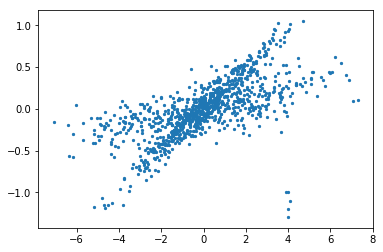

In [164]:
plt.scatter(X[:,0], X[:,1],s=5)

In [165]:
from sklearn.mixture import GaussianMixture

In [192]:
gmm = GaussianMixture(n_components=3)

In [193]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [194]:
pred = gmm.predict(X)

In [198]:
pred[:50]

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

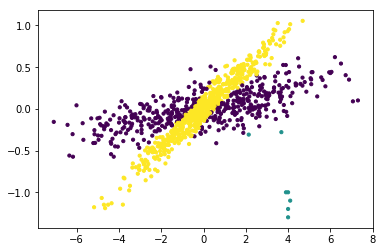

In [197]:
plt.scatter(X[:,0], X[:,1],s=10,c=pred)

### 4. Fitting Elliptical Envelope
* The assumption here is, regular data comes from known distribution ( Gaussion distribution )
* Inliner location & variance will be calculated using `Mahalanobis distances` which is less impacted by outliers.
* Calculate robust covariance fit of the data.

In [207]:
X,_ = make_blobs(n_features=2, centers=2, cluster_std=2.5, n_samples=1000)

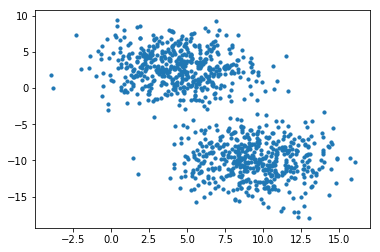

In [208]:
plt.scatter(X[:,0], X[:,1],s=10)

In [209]:
from sklearn.covariance import EllipticEnvelope

In [223]:
ev = EllipticEnvelope(contamination=.1)

In [224]:
ev.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [225]:
cluster = ev.predict(X)

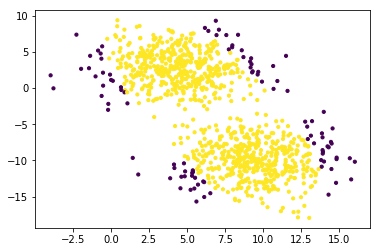

In [226]:
plt.scatter(X[:,0], X[:,1],s=10,c=cluster)

### 5. Isolation Forest
* Based on RandomForest
* Useful in detecting outliers in high dimension datasets.
* This algorithm randomly selects a feature & splits further.
* Random partitioning produces shorter part for anomolies.
* When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [227]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [228]:
from sklearn.ensemble import IsolationForest

In [261]:
data = np.r_[X_train,X_test,X_outliers]

In [262]:
iso = IsolationForest(behaviour='new', contamination='auto')

In [269]:
iso.fit(data)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [270]:
pred = iso.predict(data)

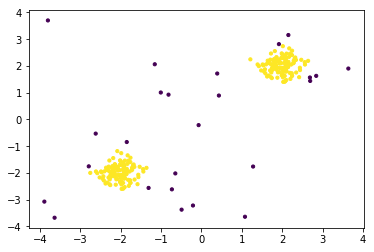

In [272]:
plt.scatter(data[:,0], data[:,1],s=10,c=pred)

### 6. Local Outlier Factor
* Based on nearest neighbours
* Suited for moderately high dimension datasets
* LOF computes a score reflecting degree of abnormility of a data.
* LOF Calculation
  - Local density is calculated from k-nearest neighbors.
  - LOF of each data is equal to the ratio of the average local density of his k-nearest neighbors, and its own local density.
  - An abnormal data is expected to have smaller local density.
* LOF tells you not only how outlier the data is but how outlier is it with respect to all data

In [273]:
from sklearn.neighbors import LocalOutlierFactor

In [276]:
lof = LocalOutlierFactor(n_neighbors=25,contamination=.1)

In [278]:
pred = lof.fit_predict(data)

In [280]:
s = np.abs(lof.negative_outlier_factor_)

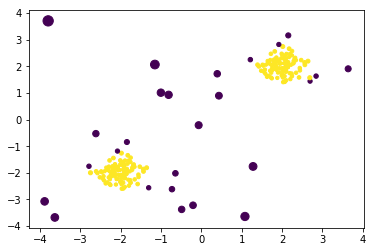

In [281]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=pred)

### 7. Outlier Detection using DBSCAN
* DBSCAN is a clustering method based on density
* Groups data which are closer to each other.
* Doesn't use distance vector calculation method
* Data not close enough to any cluster is not assigned any cluster & these can be anomalies
* eps controls the degree of considering a data part of cluster

In [282]:
from sklearn.cluster import DBSCAN

In [289]:
dbscan = DBSCAN(eps=.3)

In [290]:
dbscan.fit(data)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

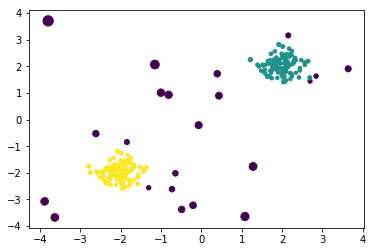

In [291]:
plt.scatter(data[:,0], data[:,1],s=s*10,c=dbscan.labels_)